# Sección 3: Discontinuidades en funciones

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, limit, Eq, solve, Piecewise
from sympy.plotting import plot
import warnings
warnings.filterwarnings("ignore", module="matplotlib")

# Configuuración inicial de los gráficos
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

## 2. Discontinuidades de punto (removibles)

**Definición**: Una discontinuidad puntual o removible ocurre cuando hay un "hueco" en la gráfica de la función en un punto específico, pero los límites laterales existen y son iguales.

*Propiedades*:

- El límite general existe (límites laterales son iguales)
- La función no está definida o está mal definida en ese punto
- Se puede "remover" redefiniendo la función en ese punto

### Ejemplo 1: Función racional con discontinuidad removible

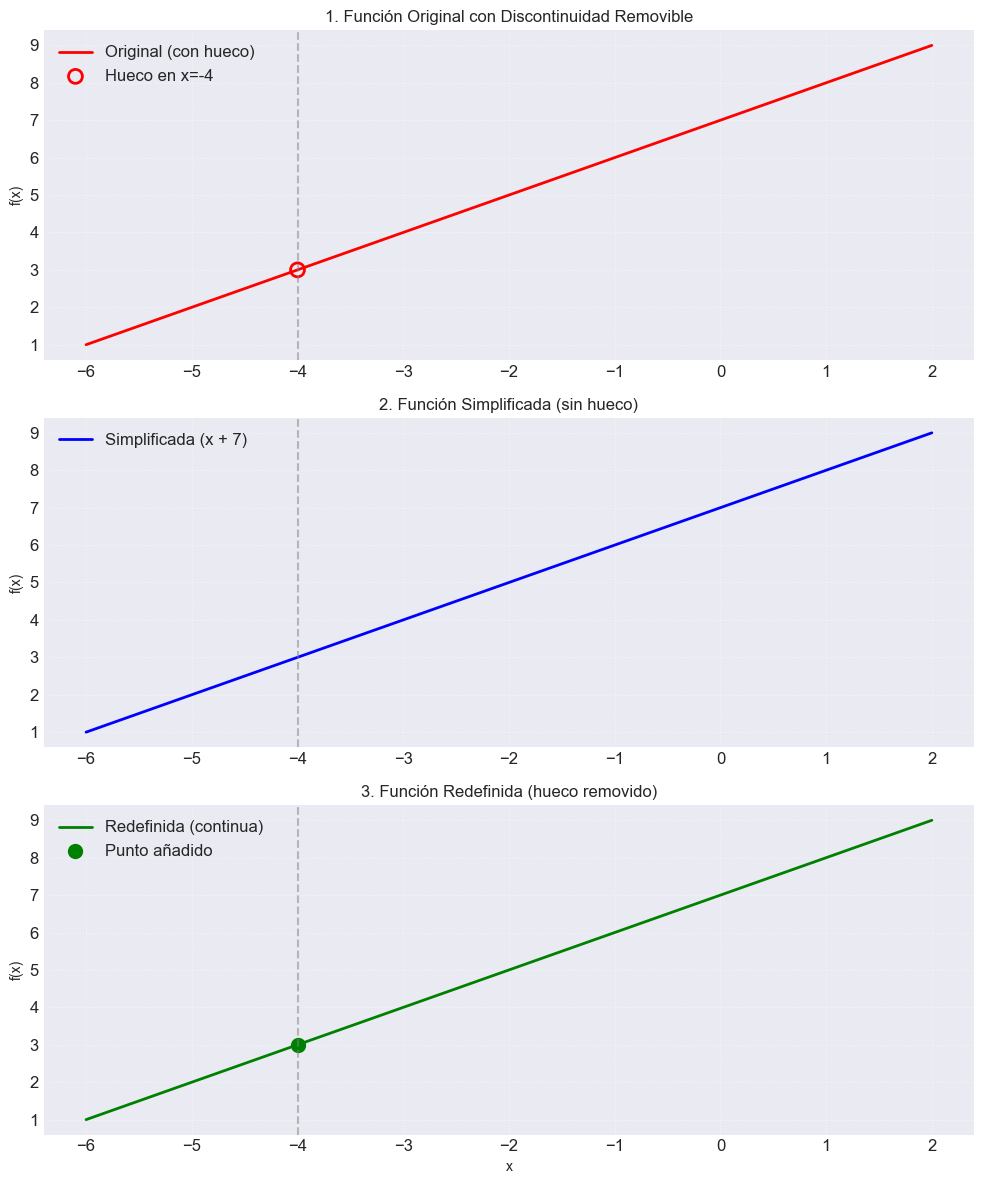

In [17]:
x = symbols('x')
f = (x**2 + 11*x + 28)/(x + 4)
f_simplified = x + 7
discontinuity = -4
y_value = f_simplified.subs(x, discontinuity)  # = 3

# Datos para el gráfico
x_vals = np.linspace(-6, 2, 500)
x_vals = x_vals[x_vals != discontinuity]  # Excluir x=-4

# Configuración de la figura
plt.figure(figsize=(10, 12))

# --- Gráfico 1: Función ORIGINAL (con hueco) ---
plt.subplot(3, 1, 1)  # 3 filas, 1 columna, posición 1
y_original = [(x**2 + 11*x + 28)/(x + 4) for x in x_vals]
plt.plot(x_vals, y_original, 'r-', linewidth=2, label='Original (con hueco)')
plt.scatter(discontinuity, f_simplified.subs(x, discontinuity),
            facecolors='none', edgecolors='red', s=100, linewidths=2,
            label='Hueco en x=-4')
plt.title('1. Función Original con Discontinuidad Removible', fontsize=12)
plt.ylabel('f(x)', fontsize=10)
plt.legend(loc='upper left')
plt.grid(True, linestyle=':', alpha=0.5)
plt.axvline(x=discontinuity, color='gray', linestyle='--', alpha=0.5)

# --- Gráfico 2: Función SIMPLIFICADA ---
plt.subplot(3, 1, 2)  # Posición 2
y_simplified = x_vals + 7
plt.plot(x_vals, y_simplified, 'b-', linewidth=2, label='Simplificada (x + 7)')
plt.title('2. Función Simplificada (sin hueco)', fontsize=12)
plt.ylabel('f(x)', fontsize=10)
plt.legend(loc='upper left')
plt.grid(True, linestyle=':', alpha=0.5)
plt.axvline(x=discontinuity, color='gray', linestyle='--', alpha=0.5)

# --- Gráfico 3: Función REDEFINIDA (continua) ---
plt.subplot(3, 1, 3)  # Posición 3
y_continuous = [x + 7 if x != discontinuity else y_value for x in x_vals]
plt.plot(x_vals, y_continuous, 'g-', linewidth=2,
         label='Redefinida (continua)')
plt.scatter(discontinuity, y_value, color='green',
            s=100, label='Punto añadido')
plt.title('3. Función Redefinida (hueco removido)', fontsize=12)
plt.xlabel('x', fontsize=10)
plt.ylabel('f(x)', fontsize=10)
plt.legend(loc='upper left')
plt.grid(True, linestyle=':', alpha=0.5)
plt.axvline(x=discontinuity, color='gray', linestyle='--', alpha=0.5)

# Ajustar espaciado entre subgráficos
plt.tight_layout()
plt.show()

### Ejemplo 2: Otra función con discontinuidad removible

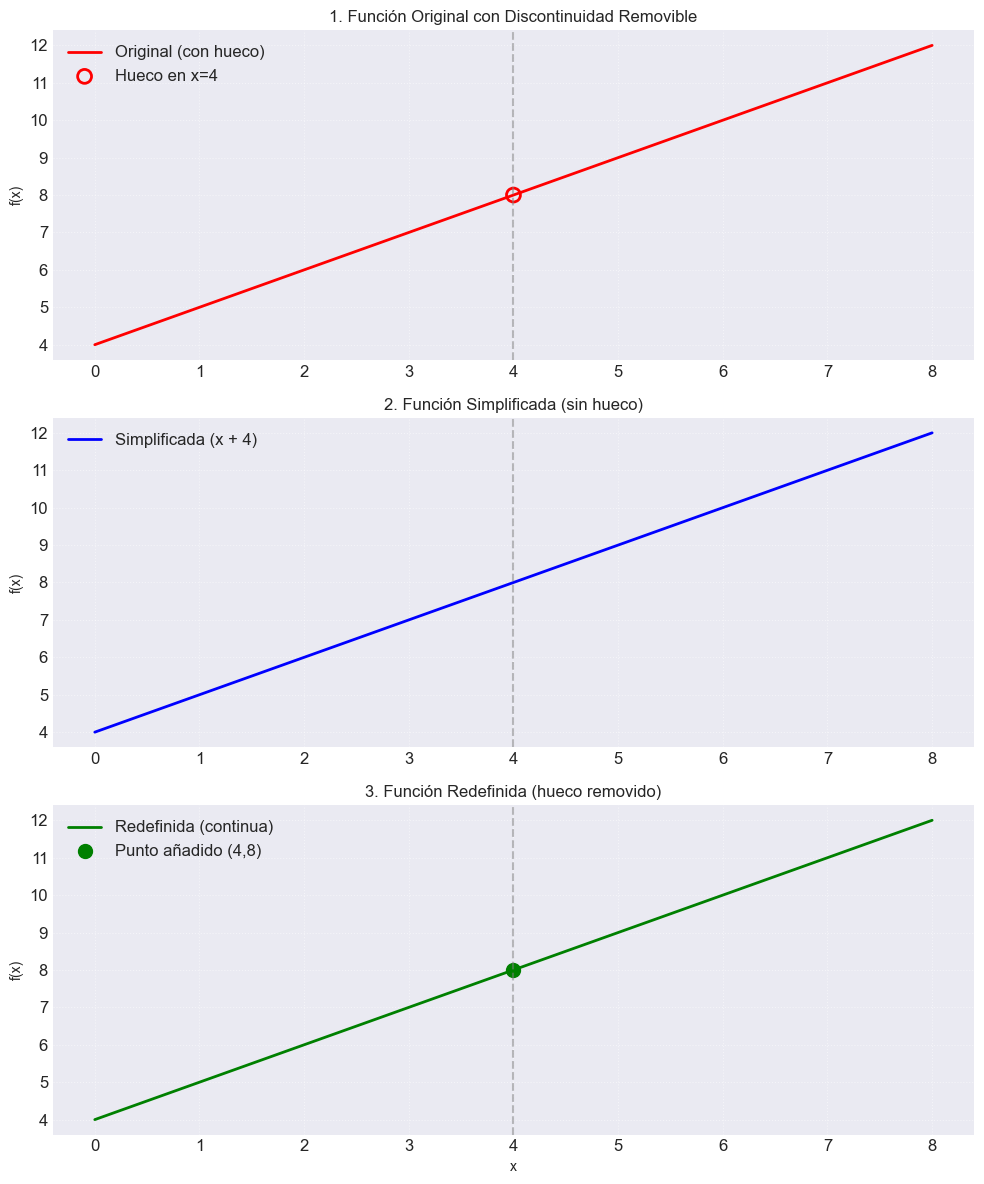

In [20]:
x = symbols('x')
f2 = (x**2 - 16)/(x - 4)
f2_simplified = (x - 4)*(x + 4)/(x - 4)
f2_final = x + 4

discontinuity2 = 4
y_value2 = f2_final.subs(x, discontinuity2)  # = 8

# Datos para el gráfico
x_vals = np.linspace(0, 8, 500)
x_vals = x_vals[x_vals != discontinuity2]  # Excluir x=4

# Configuración de la figura
plt.figure(figsize=(10, 12))

# --- Gráfico 1: Función ORIGINAL (con hueco) ---
plt.subplot(3, 1, 1)
y_original = [(x**2 - 16)/(x - 4) for x in x_vals]
plt.plot(x_vals, y_original, 'r-', linewidth=2, label='Original (con hueco)')
plt.scatter(discontinuity2, f2_final.subs(x, discontinuity2),
            facecolors='none', edgecolors='red', s=100, linewidths=2,
            label='Hueco en x=4')
plt.title('1. Función Original con Discontinuidad Removible', fontsize=12)
plt.ylabel('f(x)', fontsize=10)
plt.legend(loc='upper left')
plt.grid(True, linestyle=':', alpha=0.5)
plt.axvline(x=discontinuity2, color='gray', linestyle='--', alpha=0.5)

# --- Gráfico 2: Función SIMPLIFICADA ---
plt.subplot(3, 1, 2)
y_simplified = x_vals + 4
plt.plot(x_vals, y_simplified, 'b-', linewidth=2, label='Simplificada (x + 4)')
plt.title('2. Función Simplificada (sin hueco)', fontsize=12)
plt.ylabel('f(x)', fontsize=10)
plt.legend(loc='upper left')
plt.grid(True, linestyle=':', alpha=0.5)
plt.axvline(x=discontinuity2, color='gray', linestyle='--', alpha=0.5)

# --- Gráfico 3: Función REDEFINIDA (continua) ---
plt.subplot(3, 1, 3)
y_continuous = [x + 4 if x != discontinuity2 else y_value2 for x in x_vals]
plt.plot(x_vals, y_continuous, 'g-', linewidth=2,
         label='Redefinida (continua)')
plt.scatter(discontinuity2, y_value2, color='green',
            s=100, label='Punto añadido (4,8)')
plt.title('3. Función Redefinida (hueco removido)', fontsize=12)
plt.xlabel('x', fontsize=10)
plt.ylabel('f(x)', fontsize=10)
plt.legend(loc='upper left')
plt.grid(True, linestyle=':', alpha=0.5)
plt.axvline(x=discontinuity2, color='gray', linestyle='--', alpha=0.5)

# Ajustar espaciado
plt.tight_layout()
plt.show()

## 2. Discontinuidades de Salto

**Definición**: Una discontinuidad de salto ocurre cuando los límites laterales existen pero son diferentes, creando un "salto" en la gráfica.

*Propiedades*:
- Los límites laterales existen pero son distintos
- El límite general no existe
- Común en funciones definidas por partes

### Ejemplo: Función de costo postal

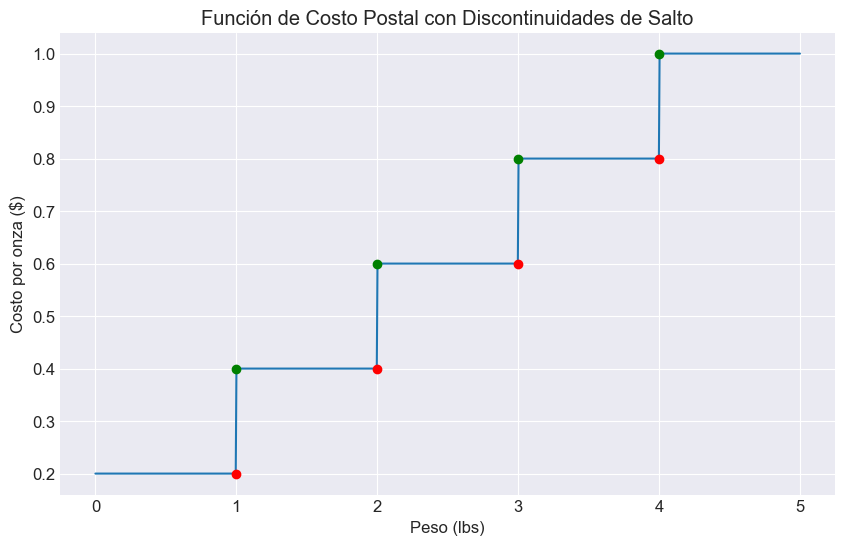

In [21]:
def postal_cost(x):
    if x < 1:
        return 0.2
    elif 1 <= x < 2:
        return 0.4
    elif 2 <= x < 3:
        return 0.6
    elif 3 <= x < 4:
        return 0.8
    else:
        return 1.0


x_vals = np.linspace(0, 5, 1000)
y_vals = [postal_cost(x) for x in x_vals]

plt.figure()
plt.plot(x_vals, y_vals)
plt.title('Función de Costo Postal con Discontinuidades de Salto')
plt.xlabel('Peso (lbs)')
plt.ylabel('Costo por onza ($)')
plt.scatter([1, 2, 3, 4], [0.2, 0.4, 0.6, 0.8], color='red', zorder=5)
plt.scatter([1, 2, 3, 4], [0.4, 0.6, 0.8, 1.0], color='green', zorder=5)
plt.grid(True)
plt.show()

## 3. Discontinuidades Infinitas (Asíntotas Verticales)

**Definición**: Ocurren cuando la función tiende a infinito (positivo o negativo) en un punto, creando una asíntota vertical.

*Propiedades*:
- La función crece o decrece sin límite al acercarse al punto
- El límite no existe (o es infinito)
- Común en funciones racionales donde el denominador se hace cero

### Ejemplo: Función con asíntota vertical

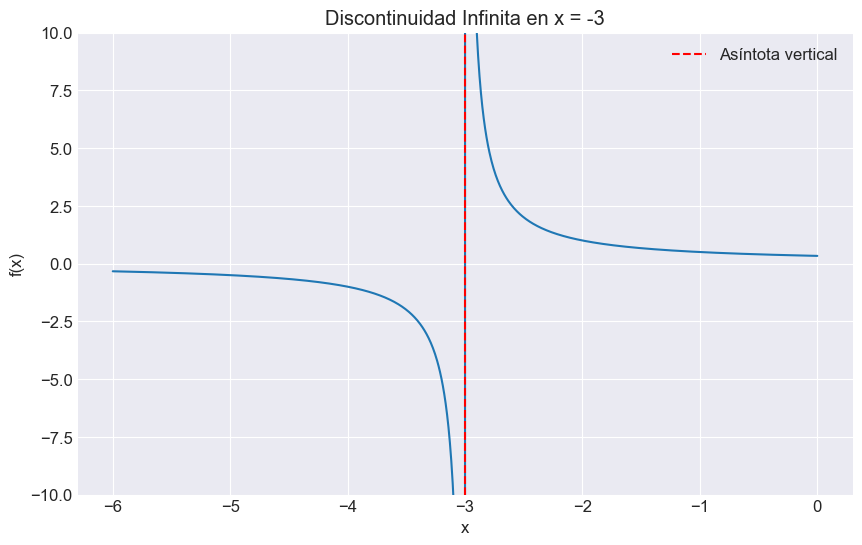

In [22]:
f3 = 1/(x + 3)

# Punto de discontinuidad
discontinuity3 = -3

# Graficamos
x_vals = np.linspace(-6, 0, 1000)
x_vals = x_vals[x_vals != -3]  # Excluimos el punto de discontinuidad
y_vals = 1/(x_vals + 3)

plt.figure()
plt.plot(x_vals, y_vals)
plt.axvline(x=-3, color='red', linestyle='--', label='Asíntota vertical')
plt.title('Discontinuidad Infinita en x = -3')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-10, 10)  # Limitamos el rango y para mejor visualización
plt.legend()
plt.grid(True)
plt.show()

## 4. Discontinuidades en Puntos Extremos

**Definición**: Ocurren en los extremos del dominio de una función cuando la función no está definida más allá de esos puntos.

*Propiedades*:
- Uno de los límites laterales no existe
- El límite general no existe
- Típico de funciones definidas en intervalos cerrados

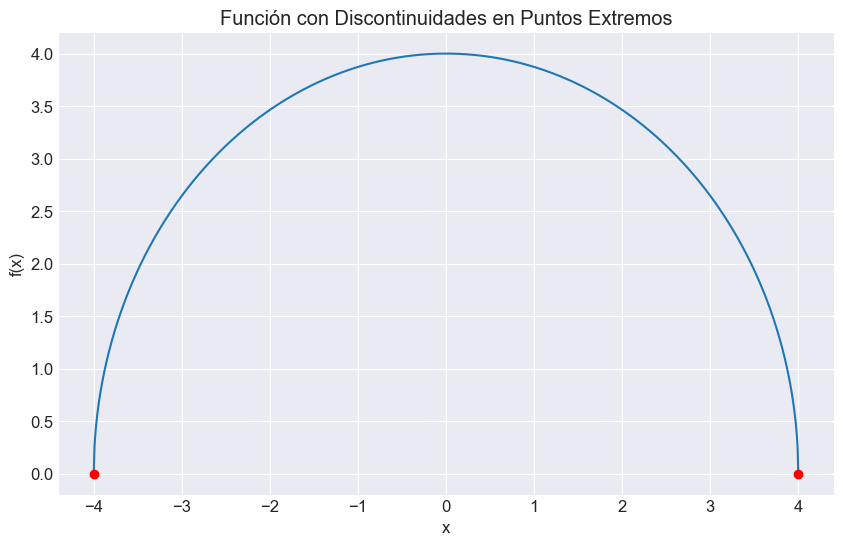

In [23]:
def endpoint_function(x):
    return np.sqrt(16 - x**2)


x_vals_left = np.linspace(-4, 4, 1000)
y_vals_left = endpoint_function(x_vals_left)

plt.figure()
plt.plot(x_vals_left, y_vals_left)
plt.scatter([-4, 4], [0, 0], color='red', zorder=5)
plt.title('Función con Discontinuidades en Puntos Extremos')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

## Resumen de Propiedades de Discontinuidades
| Tipo de Discontinuidad | Límite Existe | Límites Laterales | ¿Removible? | Ejemplo Típico |
| ---------------------- | ------------- | ----------------- | ----------- | -------------- |
| Puntual (Removible) | Sí | Iguales | Sí | $\frac{(x-2)(x+3)}{x-2}$ |
| Salto | No | Existen pero distintos | No | Funciones por partes |
| Infinita | No | Al menos uno es ∞ | No | $\frac{1}{x}$ |
| Punto Extremo | No | Uno no existe | No | $\sqrt{4-x^2}$ en x=±2 |
